In [263]:
import pandas as pd
import numpy as np

In [264]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [270]:
train = pd.read_csv('titanic_train.csv')

In [271]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

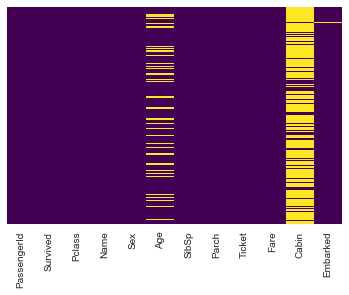

In [273]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [275]:
train.drop(['Name',"Ticket","PassengerId","Cabin"],inplace=True,axis=1)

In [276]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [277]:
train.shape

(891, 8)

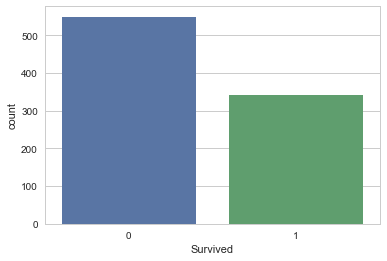

In [278]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train)

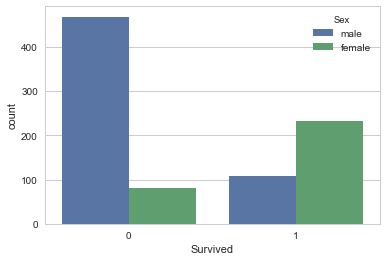

In [279]:
sns.countplot(x="Survived",hue="Sex",data=train)

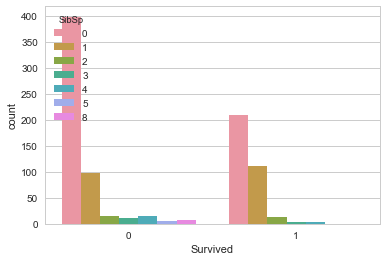

In [280]:
sns.countplot(x="Survived",hue="SibSp",data=train)

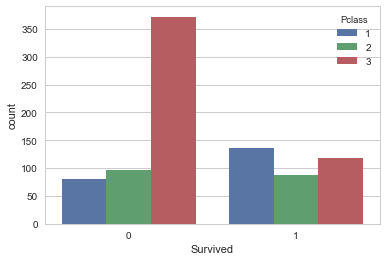

In [281]:
sns.countplot(x="Survived",hue="Pclass",data=train)

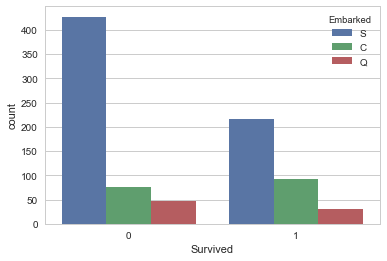

In [282]:
sns.countplot(x="Survived",hue="Embarked",data=train)

/Users/abhisheklomsh/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


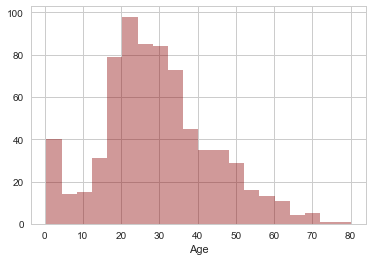

In [283]:
sns.distplot(train["Age"].dropna(),kde=False,color='darkred')

/Users/abhisheklomsh/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


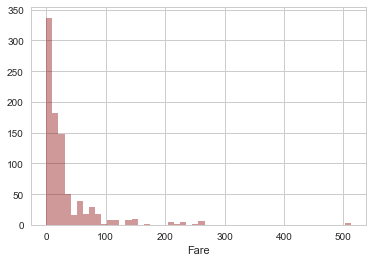

In [284]:
sns.distplot(train["Fare"].dropna(),kde=False,color='darkred')

In [285]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [286]:
sex_dummy_var = pd.get_dummies(train.Sex,drop_first=True)
embarked_dummy_var = pd.get_dummies(train.Embarked,drop_first=True)

In [287]:
train = pd.concat([train,sex_dummy_var,embarked_dummy_var],axis=1)

In [288]:
train.drop(["Sex","Embarked"],axis=1,inplace=True)

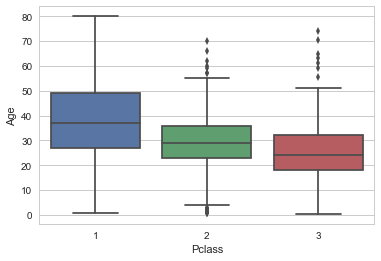

In [289]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [290]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age


In [291]:
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

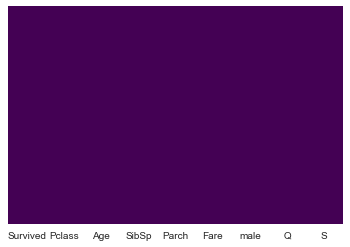

In [292]:
sns.heatmap(train.isnull(),cmap="viridis",yticklabels=False,cbar=False)

In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [294]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X_train,X_test,y_train,y_test = train_test_split(train.drop(["Survived"],axis=1),train["Survived"],test_size=0.3,random_state=101)

In [297]:
from sklearn.linear_model import LogisticRegression

In [298]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [299]:
predictions = log_model.predict(X_test)

In [300]:
from sklearn.metrics import classification_report

In [301]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268

